In [24]:
import os
import sys
from pathlib import Path
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from autoeq.frequency_response import FrequencyResponse
from autoeq.peq import LowShelf, Peaking, HighShelf, PEQ

In [3]:
DIR_PATH = Path().resolve()
AUTOEQ_PATH = DIR_PATH.parent.parent.joinpath('AutoEq')

In [39]:
lmg_06 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'LMG 5128 0.6.csv'))
lmg_06.interpolate()
lmg_06.center()
lmg_06.write_csv(AUTOEQ_PATH.joinpath('targets', 'LMG 5128 0.6.csv'))

In [42]:
harman_in_room = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman loudspeaker in-room flat 2013.csv'))
harman_in_room.interpolate()
harman_in_room.center()
harman_in_room.write_csv(AUTOEQ_PATH.joinpath('targets', 'Harman loudspeaker in-room flat 2013.csv'))

In [43]:
df_5128 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128.csv'))
df_5128.interpolate()
df_5128.center()
df_5128.write_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128.csv'))

In [47]:
df_5128 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128 -1dB per octave.csv'))
df_5128.interpolate()
df_5128.center()
df_5128.write_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128 -1dB per octave.csv'))

In [48]:
harman_2018 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman over-ear 2018.csv'))
harman_in_room = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Harman loudspeaker in-room flat 2013.csv'))
df_5128 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128.csv'))
df_5128_tilted = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'Diffuse field 5128 -1dB per octave.csv'))
lmg_06 = FrequencyResponse.read_csv(AUTOEQ_PATH.joinpath('targets', 'LMG 5128 0.6.csv'))

In [30]:
peq = PEQ(
    harman_2018.frequency.copy(), 44100,
    filters=[
        LowShelf(harman_2018.frequency.copy(), 44100, optimize_fc=False, fc=105, optimize_q=True, optimize_gain=True),
        HighShelf(harman_2018.frequency.copy(), 44100, optimize_fc=False, fc=2500, optimize_q=True, optimize_gain=True),
        Peaking(harman_2018.frequency.copy(), 44100, optimize_fc=True, min_fc=2000, max_fc=4000, optimize_q=True, optimize_gain=True)
    ],
    target=harman_2018.raw - harman_in_room.raw)
peq.optimize()
for filter in peq.filters:
    print(filter)

LowShelf 105 Hz, 0.51 Q, 8.9 dB
HighShelf 2500 Hz, 0.60 Q, -1.8 dB
Peaking 2733 Hz, 2.29 Q, -1.4 dB


In [49]:
df_5128_harman_2018_delta = FrequencyResponse(name='5128 Harman 2018 delta', frequency=harman_2018.frequency, raw=df_5128.raw + (harman_2018.raw - harman_in_room.raw))
df_5128_harman_filters = FrequencyResponse(name='5128 with Harman filters', frequency=harman_2018.frequency, raw=df_5128.raw + peq.fr)

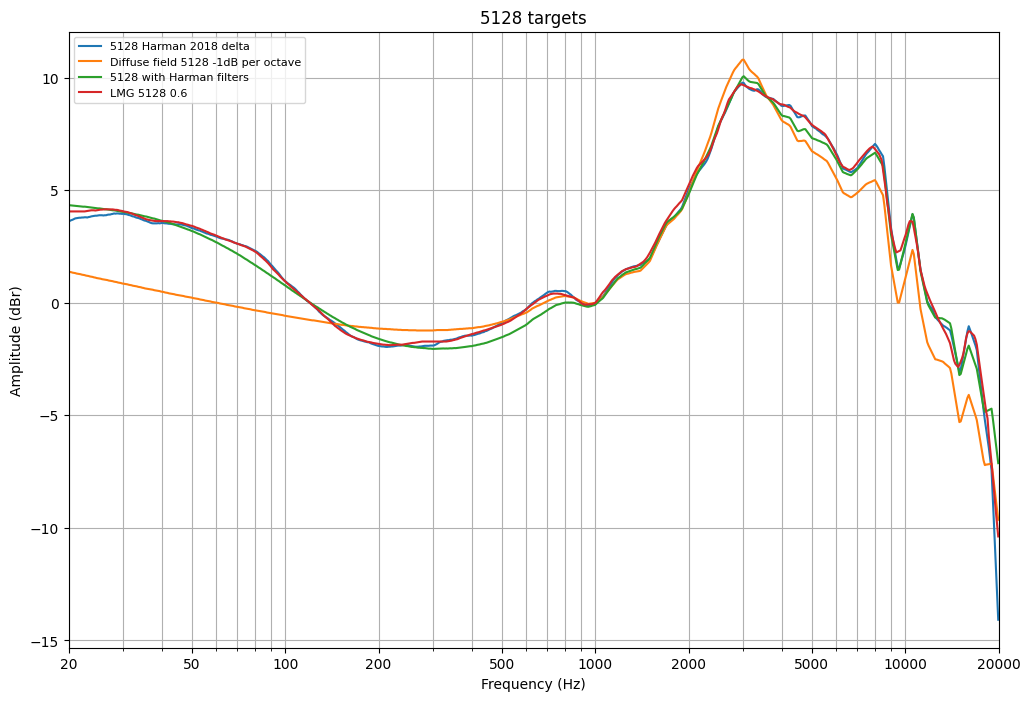

In [51]:
fig, ax = df_5128_harman_2018_delta.plot(show_fig=False, raw_plot_kwargs={'color': 'C0', 'label': df_5128_harman_2018_delta.name})
df_5128_tilted.plot(fig=fig, ax=ax, show_fig=False, raw_plot_kwargs={'color': 'C1', 'label': df_5128_tilted.name})
df_5128_harman_filters.plot(fig=fig, ax=ax, show_fig=False, raw_plot_kwargs={'color': 'C2', 'label': df_5128_harman_filters.name})
lmg_06.plot(fig=fig, ax=ax, show_fig=False, raw_plot_kwargs={'color': 'C3', 'label': lmg_06.name})
ax.set_title('5128 targets')
plt.show()

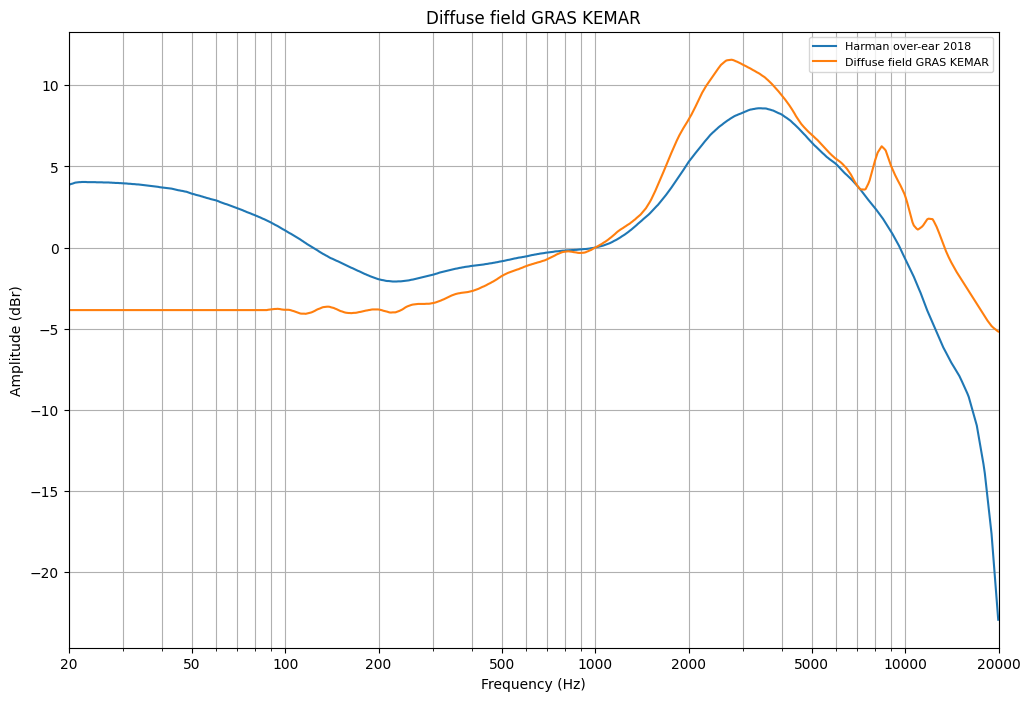

In [19]:
fig, ax = harman_2018.plot(show_fig=False, raw_plot_kwargs={'color': 'C0', 'label': harman_2018.name})
fig, ax = df_gras_kemar.plot(fig=fig, ax=ax, show_fig=False, raw_plot_kwargs={'color': 'C1', 'label': df_gras_kemar.name})

In [ ]:
6.6 dB, 105 Hz, 0.7759 Q
-1.41 dB, 2500 Hz, 0.3913 Q